In [9]:
import plotly.graph_objects as go
from streamlit_option_menu import option_menu
import numpy as np
import pandas as pd

score=np.load('./history/score_101.npy',allow_pickle='TRUE').item()
score = dict(sorted(score.items(), key=lambda x: x[1],reverse=False)   )
key_list = list(score.keys())
val_list = list(score.values())
df = pd.DataFrame(
    {
        "Y": ['Japan', 'United Kingdom', 'Canada', 'Netherlands',
     'United States', 'Belgium', 'Sweden', 'Switzerland'],

        "X": [1.3586, 2.2623000000000002, 4.9821999999999997, 6.5096999999999996,
            7.4812000000000003, 7.5133000000000001, 15.2148, 17.520499999999998
            ]
    }
)

y_saving = [1.3586, 2.2623000000000002, 4.9821999999999997, 6.5096999999999996,
            7.4812000000000003, 7.5133000000000001, 15.2148, 17.520499999999998
            ]

x = ['Japan', 'United Kingdom', 'Canada', 'Netherlands',
     'United States', 'Belgium', 'Sweden', 'Switzerland']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=val_list,
    y=key_list,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    # name='Household savings, percentage of household disposable income',
    orientation='h',
))


fig.update_layout(
    title='<b>Top 5 Predictions</b>',
    # width=800,
    # height=500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        # domain=[0, 0.85],
        tickfont = dict(size=15),
    ),
    xaxis_title="X Axis Title",
    # legend=dict(x=0.029, y=1.038, font_size=20),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin_pad=10
)

annotations = []

y_s = np.round(y_saving, decimals=2)

# Adding labels
for  yd, xd in zip( y_s, x):
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd +1,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=16,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)


fig.show()

# score


In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
history_load=np.load('./history/history_2.npy',allow_pickle='TRUE').item()
history_load
def plotHistory(history_load):
    loss = history_load['loss']
    val_loss = history_load['val_loss']

    accuracy = history_load['accuracy']
    val_accuracy = history_load['val_accuracy']

    epochs = np.arange(0,len(history_load['loss']))

    fig = make_subplots(rows=1, cols=2,subplot_titles = ('Accuracy', 'Loss'))
    fig.add_trace(
        go.Scatter(x=epochs, y=accuracy,name='accuracy'),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=epochs, y=val_accuracy,name='val_accuracy'),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=epochs, y=loss,name='loss'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=epochs, y=val_loss,name='val_loss'),
        row=1, col=2
    )

    fig.update_layout(  height=600, width=800, 
                        title_text="Evaluate the model",
                        yaxis=dict(
                            domain=[0, 0.75],
                        ),
                        yaxis2=dict(
                            domain=[0, 0.75],
                        ),
                        legend=dict(x=0.029, y=1.038,font_size = 12),
                    )
    fig.update_annotations(yshift=-100)

    # Update xaxis properties
    fig.update_xaxes(title_text="Epochs", row=1, col=1)
    fig.update_xaxes(title_text="Epochs", row=1, col=2)

    fig.show()

plotHistory(history_load)


In [170]:
import tensorflow as tf
from PIL import Image
# Make a function for preprocessing images

def preprocess_img(filename, img_shape=224, rescale = False):
  # Read in target file (an image)
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  if rescale:
    img = img/255.
  
  return img
url_img = './extras/test.jpg'
image = np.array(Image.open(url_img).convert('RGB'))
preprocessed_img = preprocess_img(url_img, img_shape=224, rescale=True)

print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")


Image before preprocessing:
 [[[64 74 84]
  [62 72 81]
  [66 73 79]
  ...
  [65 64 70]
  [61 60 66]
  [69 68 74]]

 [[74 82 93]
  [72 81 90]
  [74 81 87]
  ...
  [60 59 65]
  [62 61 67]
  [69 68 74]]]...,
Shape: (676, 1200, 3),
Datatype: uint8

Image after preprocessing:
 [[[0.2926408  0.32261282 0.33227667]
  [0.38284564 0.375      0.39103642]
  [0.44306347 0.41904387 0.4288478 ]
  ...
  [0.24198274 0.23806117 0.2615906 ]
  [0.23276006 0.22883849 0.25236788]
  [0.23430525 0.23038368 0.25391307]]

 [[0.3026398  0.31806725 0.3299182 ]
  [0.3814963  0.38491395 0.41446579]
  [0.40902734 0.33889303 0.3014518 ]
  ...
  [0.17424187 0.1703203  0.19384973]
  [0.2639236  0.26000202 0.28353143]
  [0.2612061  0.25728452 0.28081393]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


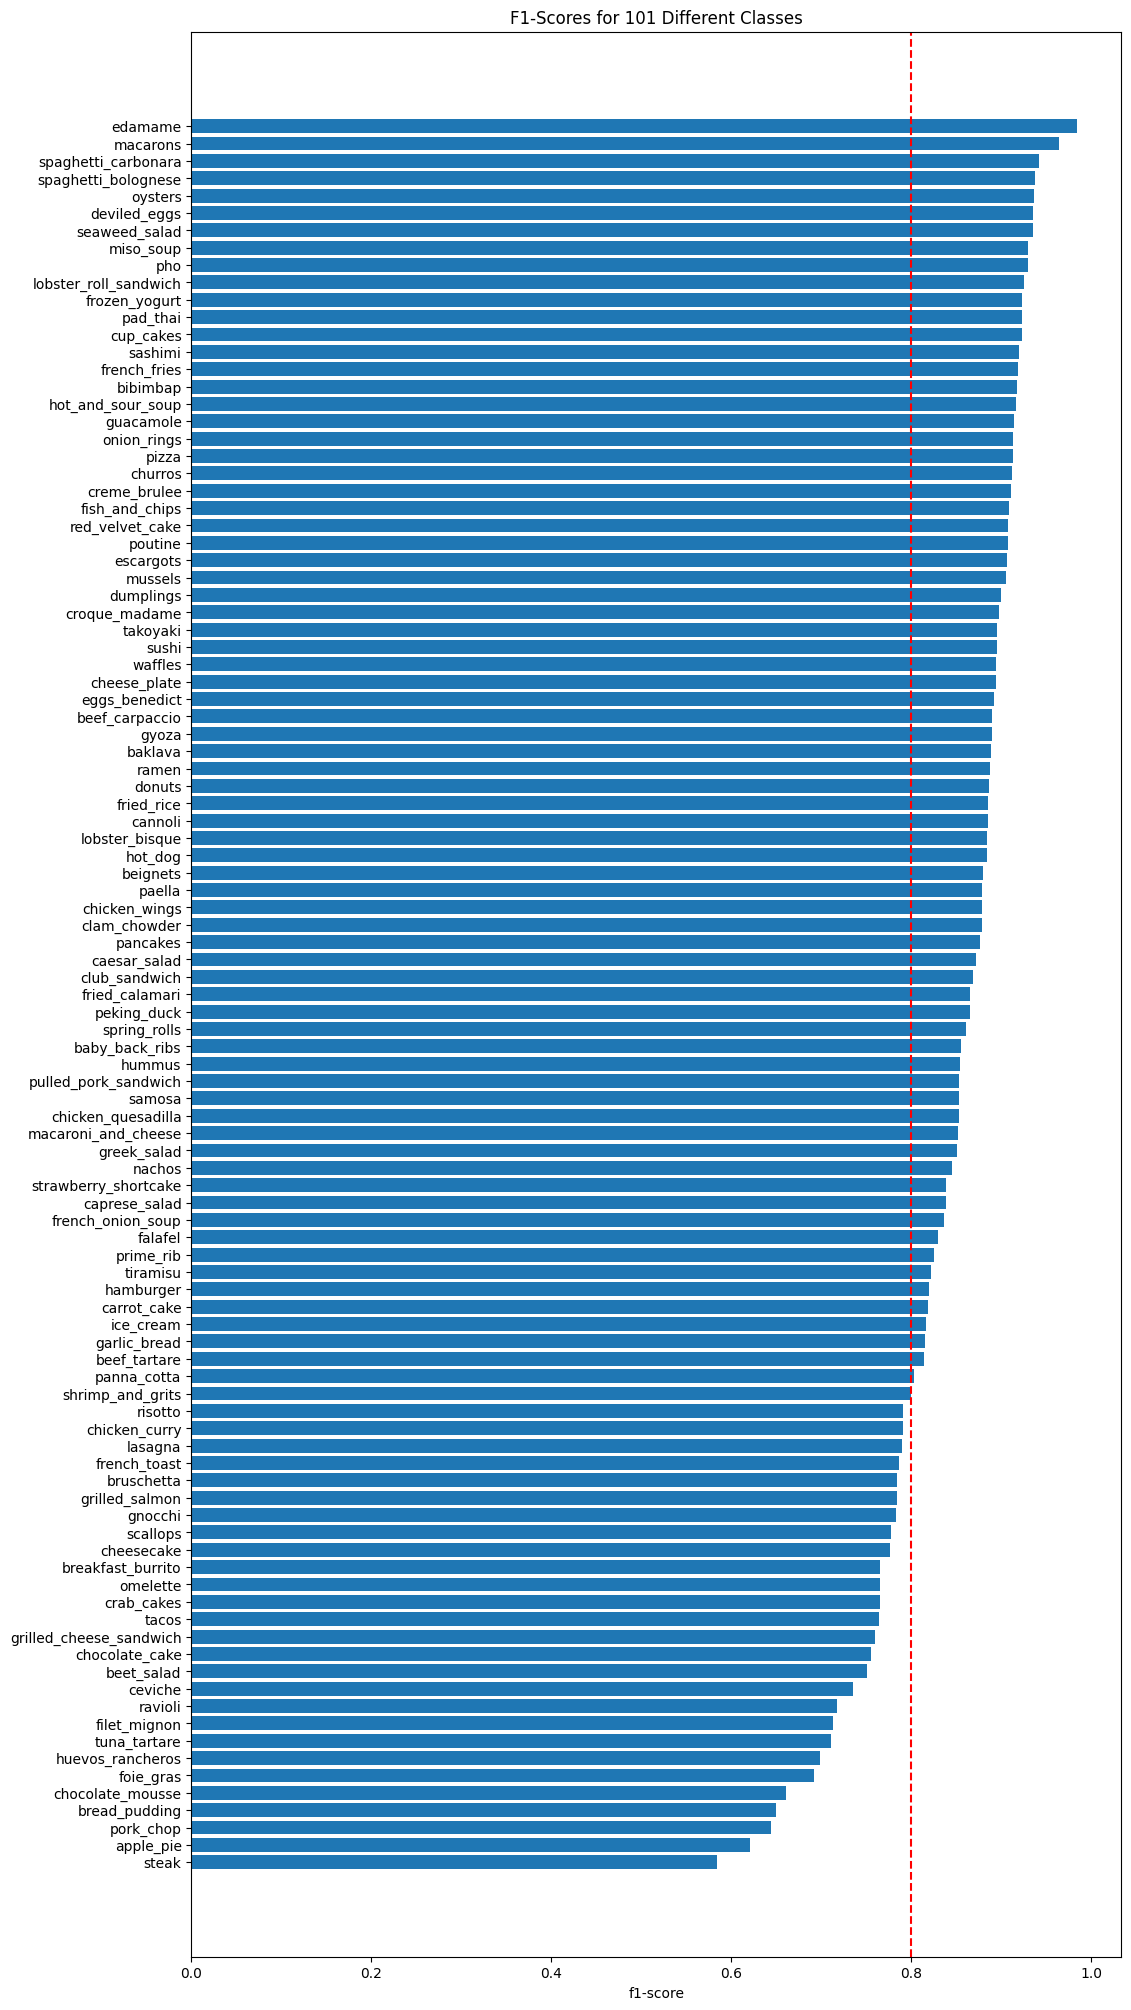

In [34]:
import matplotlib.pyplot as plt
class_f1_scores=np.load('./history/score_101.npy',allow_pickle='TRUE').item()
report_df = pd.DataFrame(class_f1_scores, index = ['f1-scores']).T
report_df = report_df.sort_values("f1-scores", ascending=False)
class_names = report_df.index.values.tolist()
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(report_df)), report_df["f1-scores"].values)
ax.set_yticks(range(len(report_df)))
plt.axvline(x=0.80, linestyle='--', color='r')
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 101 Different Classes")
ax.invert_yaxis(); # reverse the order


